In [2]:
import torch
import numpy as np
import os
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
# MNIST Dataset , download training
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download= True,
    transform=ToTensor(),
)

# Download test sets
testing_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(testing_data, batch_size=batch_size)

for X,y in test_dataloader:
    print("Shape of Table N x C x H x W:",X.shape)
    print("Shape of y:",y.shape, y.dtype)
    break

Shape of Table N x C x H x W: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
learning_rate = 1e-3
batch_size = 64
epochs = 5
 
# Loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        #Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropegation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss,current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
 

In [16]:
# Test the models performance to see if it is learning
def test(dataloader, model, loss_fn):
    
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X,y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [17]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1

loss: 1.165938  [   64/60000]
loss: 1.173409  [ 6464/60000]
loss: 1.018877  [12864/60000]
loss: 1.147632  [19264/60000]
loss: 1.051301  [25664/60000]
loss: 1.077324  [32064/60000]
loss: 1.119235  [38464/60000]
loss: 1.078454  [44864/60000]
loss: 1.123323  [51264/60000]
loss: 1.060793  [57664/60000]
Test Error: 
 Accuracy: 64.8%, Avg loss: 1.091692 

Epoch 2

loss: 1.165938  [   64/60000]
loss: 1.173409  [ 6464/60000]
loss: 1.018877  [12864/60000]
loss: 1.147632  [19264/60000]
loss: 1.051301  [25664/60000]
loss: 1.077324  [32064/60000]
loss: 1.119235  [38464/60000]
loss: 1.078454  [44864/60000]
loss: 1.123323  [51264/60000]
loss: 1.060793  [57664/60000]
Test Error: 
 Accuracy: 64.8%, Avg loss: 1.091692 

Epoch 3

loss: 1.165938  [   64/60000]
loss: 1.173409  [ 6464/60000]
loss: 1.018877  [12864/60000]
loss: 1.147632  [19264/60000]
loss: 1.051301  [25664/60000]
loss: 1.077324  [32064/60000]
loss: 1.119235  [38464/60000]
loss: 1.078454  [44864/60000]
loss: 1.123323  [51264/60000]

In [10]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [11]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [12]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = testing_data[0][0], testing_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [13]:
import matplotlib.pyplot as plt
import random


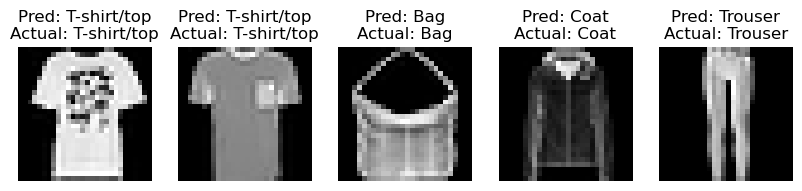

In [14]:
# Function to predict and visualize random images from the test dataset
def predict_random_images(model, dataset, num_images=5):
    model.eval()
    indices = random.sample(range(len(dataset)), num_images)
    plt.figure(figsize=(10, 5))
    
    for i, idx in enumerate(indices):
        x, y = dataset[idx][0], dataset[idx][1]
        with torch.no_grad():
            x = x.to(device)
            pred = model(x.unsqueeze(0))  
            predicted, actual = classes[pred[0].argmax(0)], classes[y]
        
        plt.subplot(1, num_images, i + 1)
        plt.title(f"Pred: {predicted}\nActual: {actual}")
        plt.imshow(x.cpu().squeeze(), cmap="gray")
        plt.axis('off')
    
    plt.show()

# Predict and visualize random images
predict_random_images(model, testing_data, num_images=5)